In [3]:
# coding: utf-8

# In[10]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# In[3]:


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

titanic = pd.concat([train, test], sort = False)

In [9]:
# features

# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat - Lifeboat (if survived)
# body - Body number (if did not survive and body was recovered)


# In[169]:


# data = titanic.count()
# print(data)


# In[170]:


# Useful Functions

def count_items(table):
    return table['PassengerId'].count()

def survived(table):
    return table.loc[table['Survived'] == 1]

def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')

def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')

def abs_and_rel(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)


# In[171]:


# 342 survived
survived = titanic.loc[titanic['Survived'] == 1]

#549 died
died = titanic.loc[titanic['Survived'] == 0]
 
survived_num = count_items(survived)
died_num = count_items(died)

# print(survived_num)
# print(died_num)

# abs_and_rel(titanic['Survived'])


# In[172]:


# Analysis of Fare feature

# max_fare = titanic['Fare'].max()
# min_fare = titanic['Fare'].min()
# mid_fare = titanic['Fare'].median()

# print(mid_fare) = 14.4542
# print(max_fare) = 512.3292
# print(min_fare) = 0.0

# 15 males travelled free all from SouthHampton, only one survived (pid = 272)
# free = titanic.loc[titanic['Fare'] == 0.0]
# free

# min-low fares = 447
min_mid = titanic.loc[titanic['Fare'] <= 14.4542]
# print(min_mid['PassengerId'].count())

# mid-max fares = 444 
mid_max = titanic.loc[titanic['Fare'] > 14.4542]
# print(mid_max['PassengerId'].count())

# 112 cheap fares survived 
cheap_fare_survived = min_mid.loc[min_mid['Survived'] == 1]
# print(cheap_fare_survived['PassengerId'].count())

# 230 expensive fares survived 
pricy_fare_survived = mid_max.loc[mid_max['Survived'] == 1]
# print(pricy_fare_survived['PassengerId'].count())


# Note: Passengers that paid for higher priced tickets had a greater than double survival rate 


# In[173]:


# Analysis of Pclass feature

# Total number of pclass1 = 216
pclass1 = titanic.loc[titanic['Pclass'] == 1]
pclass1_num = count_items(pclass1)

# Total number of pclass2 = 184
pclass2 = titanic.loc[titanic['Pclass'] == 2]
pclass2_num = count_items(pclass2)

# Total number of pclass3 = 491
pclass3 = titanic.loc[titanic['Pclass'] == 3]
pclass3_num = count_items(pclass3)


# Survival based on Pclass

# Pclass1 survival = 136
survived1 = pclass1.loc[pclass1['Survived'] == 1]
survived1_num = count_items(survived1)

# Pclass2 survival = 87
survived2 = pclass2.loc[pclass2['Survived'] == 1]
survived2_num = count_items(survived2)

# Pclass3 survival = 119 
survived3 = pclass3.loc[pclass3['Survived'] == 1]
survived3_num = count_items(survived3)


# Survival % 

# 0.6296296296296297%
pclass1_rate = survived1_num/pclass1_num
print(pclass1_rate)

# 0.47282608695652173%
pclass2_rate = survived2_num/pclass2_num
print(pclass2_rate)

# 0.24236252545824846%
pclass3_rate = survived3_num/pclass3_num
print(pclass3_rate)

# Note: We see again that passengers that had higher quality of accomodations had a much larger survival rate
# than others. Hence, there seems to be a high correlation between quality of ticket and survival


# In[174]:


# Analysis of Sex 

male = titanic.loc[titanic['Sex'] == "male"]
female = titanic.loc[titanic['Sex'] == "female"]

# 109
male_survived = male.loc[male['Survived'] == 1]

# 233
female_survived = female.loc[female['Survived'] == 1]

print(count_items(male_survived))
print(count_items(female_survived))


# In[175]:


# Analysis of Age

# Grouping information
# baby = 0 - 5
# child = 5 - 12
# teen = 12 - 18
# adult = 18 - 49
# mid-adult = 49 - 64
# senior = 64+

baby = titanic.loc[titanic['Age'] <= 5.0]
child = titanic[(titanic['Age'] > 5.0) & (titanic['Age'] <= 12.0)]
teen = titanic.loc[(titanic['Age'] > 12.0) & (titanic['Age'] <= 18.0)]
adult = titanic.loc[(titanic['Age'] > 18.0) & (titanic['Age'] <= 49.0)]
mid_adult = titanic.loc[(titanic['Age'] > 49.0) & (titanic['Age'] <= 64.0)]
senior = titanic.loc[titanic['Age'] > 64.0]
no_age = titanic.loc[titanic['Age'].isnull()]

# print(count_items(baby))
# print(count_items(child))
# print(count_items(teen))
# print(count_items(adult))
# print(count_items(mid_adult))
# print(count_items(senior))
# print(count_items(no_age))

# baby_survived = survived(baby)
# child_survived = survived(child)
# teen_survived = survived(teen)
# adult_survived = survived(adult)
# mid_adult_survived = survived(mid_adult)
# senior_survived = survived(senior)
# no_age_survived = survived(no_age)

# print(count_items(baby_survived))
# print(count_items(child_survived))
# print(count_items(teen_survived))
# print(count_items(adult_survived))
# print(count_items(mid_adult_survived))
# print(count_items(senior_survived))
# print(count_items(no_age_survived))


# Based on the groupings shown above, the number of passengers onboard based on age were:
# 
# <ul>
#     <li>0 - 5: 44  -- survived: 31</li>
#     <li>5 - 12: 25  -- survived: 9</li>
#     <li>12 - 18: 70  -- survived: 30</li>
#     <li>19 - 49: 501  -- survived: 193</li>
#     <li>49 - 64: 63  -- survived: 26</li>
#     <li>64+: 11 -- -- survived: 1</li>
#     <li>No Age: 177 -- survived: 52</li>
# </ul>

# In[176]:


# In[177]:


sns.lmplot(x='Age', y='Fare', data=titanic, fit_reg=False)

plt.ylim(0, None)
plt.xlim(0, None)


# In[178]:


# abs_and_rel(titanic['Embarked'])


# In[179]:


# abs_freq_cabin = titanic['Cabin'].value_counts(dropna=False)
# abs_freq_cabin.head(5)


# In[180]:


# abs_and_rel(titanic['SibSp'])


# In[181]:


# abs_and_rel(titanic['Parch'])


# In[182]:


'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness.'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)


# In[183]:


# titanic['Fare'].plot.kde(style = 'k--')
# titanic['Fare'].plot.hist(density = True)

# summary_stats_and_hist(titanic['Fare'])


# <h1>Feature Engineering</h1>

# <h2>Ticket</h2>

# In[184]:


ticket = []
for x in list(titanic.Ticket):
    if x.isdigit():
        ticket.append('N')
    else:
        ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
        
'''Swap values'''
titanic.Ticket = ticket

titanic.Ticket = titanic.Ticket.apply(lambda x : x[0])


# In[185]:


# display(titanic.Ticket.value_counts())


# <h2>Family</h2>

# In[186]:


titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1


# In[187]:


# titanic.head()

titanic.Family.replace(to_replace = [1], value = 'single', inplace = True)
titanic.Family.replace(to_replace = [2,3], value = 'small', inplace = True)
titanic.Family.replace(to_replace = [4,5,6], value = 'medium', inplace = True)
titanic.Family.replace(to_replace = [7,8,11], value = 'large', inplace = True)

titanic.Family.value_counts()


# Combining SibSp and Parch into one categorical column since the two columns were very closely related and as such should display similar findings. 

# In[188]:


titanic.Cabin.fillna(value = 'X', inplace = True)

titanic['Cabin'] = titanic.Cabin.apply(lambda x: x[0])


# In[189]:


# Cleaning data in titles for clarity (different words for same meanings)

titanic['Title'] = titanic.Name.str.extract('([a-zA-Z]+)\.')

titanic.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officier', inplace = True)
titanic.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
titanic.Title.replace({'Mlle': 'Miss', 'Mme':'Mrs', 'Ms':'Miss'}, inplace = True)

# titanic.Title.value_counts()


# In[190]:


def outlier(variable): 
    q1 = variable.quantile(0.25)
    q3 = variable.quantile(0.75)
    iqr = q3 - q1 
    
    u_fence = q3 + (iqr*1.5)
    l_fence = q1 - (iqr*1.5)
    
    outliers = variable[(variable < l_fence) | (variable > u_fence)]
    
    filtered = variable.drop(outliers.index, axis = 0)
        
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2,1)
    
    # Gives space between two subplots
    fig.subplots_adjust(hspace = 1) 
    
    # Plot variable with outliers
    variable.plot.box(vert = False, color = 'coral', grid = False, ax = ax1, title = 'Distribution with Outliers for %s' %variable.name)

    # Plot variable without outliers
    filtered.plot.box(vert = False, color = 'coral', grid = False, ax = ax2, title = 'Distribution without Outliers for %s' %variable.name)


# In[191]:


outlier(titanic['Age'])


# In[192]:


# display(titanic.isnull().sum())


# In[193]:


titanic.Embarked.fillna(value='S', inplace = True)


# In[194]:


correlation = titanic.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
for columns in correlation:
    plt.figure(columns)
    sns.boxplot(x = columns, y = titanic.Age, data = correlation)


# In[195]:


from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = titanic.Age # Inserting Age in dataframe correlation
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Age')
plt.show()


# In[196]:


titanic.Age = titanic.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


# In[197]:


titanic.isnull().sum()


# In[199]:


# numerical and categorical
def boxplot_and_correlation(nume,cat):
    '''cat = categorical variable, and nume = numerical variable.'''
    ax = sns.boxplot(x = cat, y = nume)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    
    plt.title('Association between Survived & Fare %s' %nume.name)
    print('Correlation between', nume.name, 'and', cat.name,':', stats.pointbiserialr(nume, cat))
    plt.show()
    return display(ax)
    
    
def nume_grouped_by_cat(nume, cat):
    global ax
    grouped_by_cat = nume.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat.rename ({1:'survived', 0:'died'}, axis = 'rows', inplace = True) # Renaming index
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar() 
    abs_bar_labels()
    plt.ylabel('Mean %s' %nume.name)
    plt.title('Survivors vs Victims Mean %s' %nume.name)
    print('Mean', nume.name, 'of Survivors vs Victims:')
    return display(grouped_by_cat)


def nume_hist_by_cat(nume,cat):
    nume[cat == 1].hist(color = ['g'], grid = False)
    nume[cat == 0].hist(color = ['r'], grid = False)
    plt.yticks([])
    plt.xlabel('%s' %nume.name)
    plt.title('Survivors vs Victims Distribution of %s' %nume.name)
    
    
def anova(nume, cat):
    group1 = nume[cat == 1]
    group0 = nume[cat == 0]
    
    f_ratio, p_value = stats.f_oneway(group1, group0)
    print("f ratio is: ", f_ratio, " and the p_value is: ", p_value)
    

def tukey(nume, group):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog = nume, 
                              groups = group,
                              alpha = 0.05)
    summary = tukey.summary()
    display(summary)


# <h2>Fare and Survival</h2>

# In[200]:


# boxplot_and_correlation(titanic.Fare, titanic.Survived)
# nume_grouped_by_cat(titanic.Fare, titanic.Survived)


# Through the boxplots, we can see that there is very little overlap between the survival rate based off of fare values. As such, we could make the assumption that fare is a strong feature in determining survival rates. Additionally, through the point biserial correlation test, we notice that we have a P-value of less than 0.05 which means that the correlation between the two is statistically significant. Finally, we can see that fare and survival are positively correlated, as the fare amount increases, so does the survival rate. 

# In[201]:


# nume_hist_by_cat(titanic.Fare, titanic.Survived)


# Through the use of the histogram, it is made evident that higher fares had much higher survival rates compared to lower fares. 

# In[202]:


# anova(titanic.Fare, titanic.Survived)


# In[203]:


# tukey(titanic.Fare, titanic.Survived)


# Anova is usually used for groups of 2 or more but I used it just to double check that my findings from the point biserial correlation test. Thus, similarly, from the anova analysis we see that the 2 groups are statistically significant and to further confirm, the tukey test results in the rejection of the null hypothesis. As such, it is confirmed that Fare and Survival are statistically significant. 
# 

# <h2>Age and Survival</h2>

# In[204]:


# boxplot_and_correlation
# nume_grouped_by_cat
# nume_hist_by_cat
# boxplot_and_correlation(titanic.Age, titanic.Survived)


# Through the use of the boxplots, we can see that the ages overlap quite a bit and as such, this could indicate that age may not be statistically significant for our analysis. Moreover, through the point biserial correlation test, we can see that p = 0.0607 > 0.05 again signaling insignificance. 

# In[205]:


# nume_grouped_by_cat(titanic.Age, titanic.Survived)


# Means are relatively the same, reinforcing the fact that Age may not be a great indicator for survival. 

# In[206]:


# nume_hist_by_cat(titanic.Age, titanic.Survived)


# Through the use of the histogram we notice that infants had greater chances of survival. 

# In[207]:


# anova(titanic.Age, titanic.Survived)


# In[208]:


# tukey(titanic.Age, titanic.Survived)


# The anova and Tukey confirm that Age is not statistically significant for out purposes. 

# <h1>Categorical vs Categorical</h1>

# In[209]:


def crosstab(cat, cat_target):
    global ax, ax1
    cat_grouped_by_target = pd.crosstab(index = cat, columns = cat_target)
    cat_grouped_by_target.rename({0: 'Victims', 1:'Survivors'}, axis = 1, inplace = True)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
    pct_cat_grouped_by_cat_target.rename({0:'Victims(%)', 1:'Survivors(%)'}, axis = 'columns', inplace = True)
    print('Survivals and Deaths by', cat.name,':', '\n',cat_grouped_by_target )
    print('\nPercentage Survivals and Deaths by', cat.name, ':','\n', pct_cat_grouped_by_cat_target)
    
    ax =  cat_grouped_by_target.plot.bar(color = ['r', 'g'])
    plt.title('Survival vs Death Count by %s' %cat.name)
    abs_bar_labels()
    plt.show()
    
    ax1 =  pct_cat_grouped_by_cat_target.plot.bar(color = ['r', 'g'])
    plt.title('Survival vs Death Count by %s' %cat.name)
    pct_bar_labels()
    plt.show()


def chi_square(cat, cat_target):
    cat_grouped_by_target = pd.crosstab(index = cat, columns = cat_target)
    freq = stats.chi2_contingency(cat_grouped_by_target)
    print(freq)
    

def bonferroni_adjusted(cat, cat_target):
    dummies = pd.get_dummies(cat)
    
    for column in dummies:
        crosstab = pd.crosstab(index = dummies[column], columns = cat_target)
        print(stats.chi2_contingency(crosstab))


# <h2>Sex and Survived</h2>

# In[210]:


# crosstab(titanic.Sex, titanic.Survived)


# In[211]:


# chi_square(titanic.Sex, titanic.Survived)


# First value is the Chi-square value, second value is the p-value, third value is the degrees of freedom, the fourth value is an array of expected frequencies. We just need to assure that expected frequencies all have values greater than 5. Looking at our specific results, we see that our p-value is below 0.05 and as such is statistically significant, additionally, all expected frequencies are greater than 5 and as such validate the results. 
# 
# Thus, we conclude that Sex and Survivorship are statistically correlated. 

# In[212]:


# titanic.head(1)


# <h2>Survived and Pclass</h2>

# In[213]:


# crosstab(titanic.Pclass, titanic.Survived)


# In[214]:


# chi_square(titanic.Pclass, titanic.Survived)


# In[215]:


# bonferroni_adjusted(titanic.Pclass, titanic.Survived)


# Note: Because there are 3 categories, the adjusted P-value for significance is 0.05/3 or 0.017
# 
# Bonferroni correlation test helps us identify which particular categories have the strongest relations with the desired target category, in our case the survivability. As we can see from the results, the first and third values' are significantly lower than that of the second and as such, we can conclude that class 2 has the weakest correlation amongst the 3.

# <h2>Embarked and Survived</h2>

# In[216]:


# titanic.head(1)


# In[217]:


# crosstab(titanic.Embarked, titanic.Survived)


# In[218]:


# chi_square(titanic.Embarked, titanic.Survived)


# In[219]:


# bonferroni_adjusted(titanic.Embarked, titanic.Survived)


# Only the passengers that embarked from point C had a positive survival rate. Embarkment from S had the most population entering and a majority not surviving. Through the chi-square test we see that the statistical relationship between Embarkment and Survivorship is significant. Through the bonferroni correlation test, we see that only the relationship between C and S with survivorship are statistically significant.

# <h2>SibSp and Survived</h2>

# In[220]:


# crosstab(titanic.SibSp, titanic.Survived)


# In[221]:


# chi_square(titanic.SibSp, titanic.Survived)


# In[222]:


# bonferroni_adjusted(titanic.SibSp, titanic.Survived)


# Since not all frequencies are greater than 5, the chi-square results cannot be trusted. 

# <h2>Ticket and Survived</h2>

# In[223]:


# crosstab(titanic.Ticket, titanic.Survived)


# In[224]:


# chi_square(titanic.Ticket, titanic.Survived)


# In[225]:


# bonferroni_adjusted(titanic.Ticket, titanic.Survived)


# Only Ticket A is statistically significant. 

# <h2>Family and Survived</h2>

# In[226]:


# crosstab(titanic.Family, titanic.Survived)


# In[227]:


# chi_square(titanic.Family, titanic.Survived)


# In[228]:


# bonferroni_adjusted(titanic.Family, titanic.Survived)


# Large and Medium are not statistically significant. 

# <h2>Title and Survived</h2>

# In[229]:


# crosstab(titanic.Title, titanic.Survived)


# In[230]:


# chi_square(titanic.Title, titanic.Survived)


# In[231]:


# bonferroni_adjusted(titanic.Title, titanic.Survived)


# <h1>Multivariate Analysis</h2>
# 
# <h4>Comparing our outcome variable (survived) with more than 2 predictor variables. We are interested in seeing any particular patterns between 2 or more variables.</h4>

# In[232]:


def multivariate_analysis(cat1, cat2, cat3, cat_target):
    grouped = round(pd.crosstab(index = [cat1, cat2, cat3], columns = cat_target, normalize = 'index')*100, 2)
    grouped.rename({0:'Died%', 1:'Survived%'}, axis = 1, inplace = True)
    ax = grouped.plot.bar(color = ['r', 'g'])
    plt.ylabel('Relative Frequency (%)')


# In[233]:


# example for Pclass, Sex and Embarked. Would want to do this for every combination or categorical data
# multivariate_analysis(titanic.Pclass, titanic.Sex, titanic.Embarked, titanic.Survived)


# <h1>Transforming Data</h1>

# In[234]:


labels_name = ['baby', 'child', 'teenager', 'young adult', 'adult', 'senior']

cut_points = [0,5,12,18,35,60,81]

titanic['AgeBin'] = pd.cut(titanic.Age, cut_points, labels = labels_name)

# display(titanic)


# In[235]:


labels_name = ['low', 'low-med', 'medium', 'high']
cut_points = [-1, 130, 260, 390, 520]

titanic['FareBin'] = pd.cut(titanic.Fare, cut_points, labels = labels_name)

# titanic.head(4)


# In[236]:


titanic.drop(columns = ['Name', 'Age', 'Fare'], inplace = True, axis = 1)


# Dropped Name as it did not add any value to our analysis. Then we also dropped Age and Fare since we binned them as opposed to just using their raw value. This is better for when we need to input our data into a machine learning algorithm especially tree decisions and forrests.

# In[237]:


titanic.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family', 'Ticket']] = titanic.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family', 'Ticket']].astype('category')

# display(titanic.dtypes)



# <h2>Encoding Categorical Variables</h2>
# 
# There are 2 different types of encoding, one is label encoding and the other is one hot encoding. Label encoding takes the elements in a column, counts the number of different types, and assigns each element type a number. This is not ideal in our situation since a ML algorithm might mistake the label encoding for some hierachy. Example if our encoding labelled family values as 0,1,2,3... then it might think that 3 deserves higher weighting than 0. This could cause problems. As such, we use one hot encoding instead. This splits the column of elements into multiple columns where everything becomes just 0 and 1s. This is much like the crosstab we saw before. If one column has the value, the others will have 0s to differentiate the elements. 




KeyError: 'Fare'

<h1>Above: Old notebook burned out memory so we will continue here instead!</h1>

In [6]:
titanic.head(1)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Family,Title,AgeBin,FareBin
0,1,0.0,3,male,1,0,A,X,S,small,Mr,young adult,low


In [15]:
titanic_transform = pd.get_dummies(titanic)

df_train = titanic_transform.iloc[:891, :]
df_test = titanic_transform.iloc[891:, :]

df_train = df_train.drop(columns = 'PassengerId', axis = 1)
df_test = df_test.drop(columns = 'Survived', axis = 1)

train_x = df_train.drop(columns = 'Survived', axis  = 1)
train_y = df_train['Survived']

test_x  = df_test.drop("PassengerId", axis = 1).copy()

display(train_x.shape, train_y.shape, test_x.shape)

(891, 47)

(891,)

(418, 47)

In [21]:
seed = 43

def train_accuracy(model):
    model.fit(train_x, train_y)
    score = model.score(train_x, train_y)
    score = np.round(score*100, 2)
    return score

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)


In [25]:
models_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC']
sorted_train_accuracy = models_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

TypeError: 'DataFrame' object is not callable

In [26]:
display(sorted_train_accuracy)

,Train_accuracy(%)
RF,90.91
DT,90.91
ETC,90.91
GBC,86.98
KNN,85.52
LR,84.18
ABC,83.95
SVC,83.39
GNB,79.46


Here we see that tree based models have the highest accuracy. This is good to note but not conclusive that this is the best algorithm. This is the case since we are testing using data that was available to us for training. This means that we already know the results and as such, this can skew the data and the accuracy could be different when comparing with the real test set where survived is unknown to us. 

So to solve this there are 2 different ways: one is train_test which splits our training set into 80 - 20. This allows us to have hidden information with answers for testing. However, another problem arises. We lose data (which is normally bad) and also if the split takes in extraneous values, this could also bring about bias to our findings. 

Thus, we use cross validation. Cross validation does similar to train_test in which it splits our data into testing and training but instead of just 1 fixed split, it continously alternates what is being tested and what is being trained and then averages the results. In this sense, we remove the bias and we also get to train our algorithms with all the data available to us. One such instance of cross validation is known as K-Fold cross validation. 

In [27]:
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    cross_scores = cross_val_score(model, train_x, train_y, cv = 10, scoring = 'accuracy').mean()
    cross_scores = np.round(cross_scores*100, 2)
    return cross_scores

x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(lr), x_val_score(svc), x_val_score(rf), x_val_score(knn), x_val_score(gnb), x_val_score(dt), x_val_score(gbc), x_val_score(abc), x_val_score(etc)]})
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
display(sorted_x_val_score)

,X_val_score(%)
SVC,83.16
LR,82.72
GBC,82.61
ABC,81.71
KNN,81.61
RF,80.59
ETC,80.59
DT,79.92
GNB,77.01


Now we notice that tree based models are not performing the best anymore, SVC and LR are now the best models. This again gives us a better glance at our data but is not conclusive yet. We have just simply applied the bare models, we need to tune them and then check once more which algorithm produces the greatest accuracy. 

In [37]:
'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned.'''
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}

'''For GBC, the following hyperparameters are usually tunned.'''
gbc_params = {'learning_rate': [0.01, 0.02, 0.05, 0.01],
              'max_depth': [4, 6, 8],
              'max_features': [1.0, 0.3, 0.1], 
              'min_samples_split': [ 2, 3, 4],
              'random_state':[seed]}

'''For SVC, the following hyperparameters are usually tunned.'''
svc_params = {'C': [6, 7, 8, 9, 10, 11, 12], 
              'kernel': ['linear','rbf'],
              'gamma': [0.5, 0.2, 0.1, 0.001, 0.0001]}

'''For DT, the following hyperparameters are usually tunned.'''
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'n_neighbors':[3, 4, 5, 6, 7, 8],
              'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

'''For ABC, the following hyperparameters are usually tunned.'''
abc_params = {'n_estimators':[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              'random_state':[seed]}

'''For ETC, the following hyperparameters are usually tunned.'''
etc_params = {'max_depth':[None],
              'max_features':[1, 3, 10],
              'min_samples_split':[2, 3, 10],
              'min_samples_leaf':[1, 3, 10],
              'bootstrap':[False],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}

def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    
    grid = GridSearchCV(model, params, cv = 10, scoring = 'accuracy', n_jobs = -1)
    grid.fit(train_x, train_y)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    print('Best score:', best_score)
    print('Best parameters:', best_params) 
    return best_params, best_score

Now we are looking at tuning the hyperparamaters for our models. GridSearch is known as one of the simplest ways of doing so. We provide it with a list of parameters and it will test every single one and then return to us a dictionnary of valuable information such as the best score and best params. GridSearch is known as an exhaustive grid-search because it tries every combination we supply it with. There are others such as randomized grid search which tests a random suite of hyperparameters and also more advanced ones like baysien grid search which use previous results to make more informed decisions and use less iterations to find desired results.

In [39]:
tune_hyperparameters(lr, params = lr_params)
lr_best_params, lr_best_score = best_params, best_score

Best score: 82.94
Best parameters: {'C': 1.0, 'penalty': 'l1'}


In [40]:
tune_hyperparameters(gbc, params = gbc_params)
gbc_best_score, gbc_best_params = best_score, best_params

Best score: 84.06
Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 0.1, 'min_samples_split': 2, 'random_state': 43}


In [43]:
tune_hyperparameters(rf, params = rf_params)
rf_best_score, rf_best_params = best_score, best_params

Best score: 83.61
Best parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20, 'random_state': 44}


Essentially, we want to run each model through the tuning function with the desired parameters. Then with the results, we can form a table and analyze. 

<h2>Results</h2>
<br>
After running all the tuning, we found that GBC and RF have the highest scores with 84.06. We will thus choose these 2 to continue our analysis. Note that these are different from just the k-fold cross validation results. Tuning matters!

In [48]:
# training our models with the best params that we found previously. Note the accuracy is identical to
# what we found above. That shows that are results are valid and ready to be analyzed.


rf  = RandomForestClassifier(**rf_best_params)
gbc = GradientBoostingClassifier(**gbc_best_params)
# svc = SVC(**svc_best_params)
# knn = KNeighborsClassifier(**knn_best_params)
# etc = ExtraTreesClassifier(**etc_best_params)
lr  = LogisticRegression(**lr_best_params)
# dt  = DecisionTreeClassifier(**dt_best_params)
# abc = AdaBoostClassifier(**abc_best_params)

'''Train all the models with optimised hyperparameters.'''
models = {'RF':rf, 'GBC':gbc, 'SVC':svc, 'KNN':knn, 'ETC':etc, 'LR':lr, 'DT':dt, 'ABC':abc}
score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(train_x, train_y)
    scores = cross_val_score(items, train_x, train_y, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

Mean Accuracy: 83.6201 (+/- 3.7329) [RF]
Mean Accuracy: 84.0671 (+/- 2.6229) [GBC]
Mean Accuracy: 83.1644 (+/- 3.1791) [SVC]
Mean Accuracy: 81.6064 (+/- 3.1900) [KNN]
Mean Accuracy: 80.5863 (+/- 2.4301) [ETC]
Mean Accuracy: 82.9422 (+/- 2.4357) [LR]
Mean Accuracy: 79.9159 (+/- 3.8614) [DT]
Mean Accuracy: 81.7112 (+/- 3.2565) [ABC]


<h2>Feature Importance</h2>
<br>
Each model will assign different weightings per feature provided. We can see this distribution with the code below. 

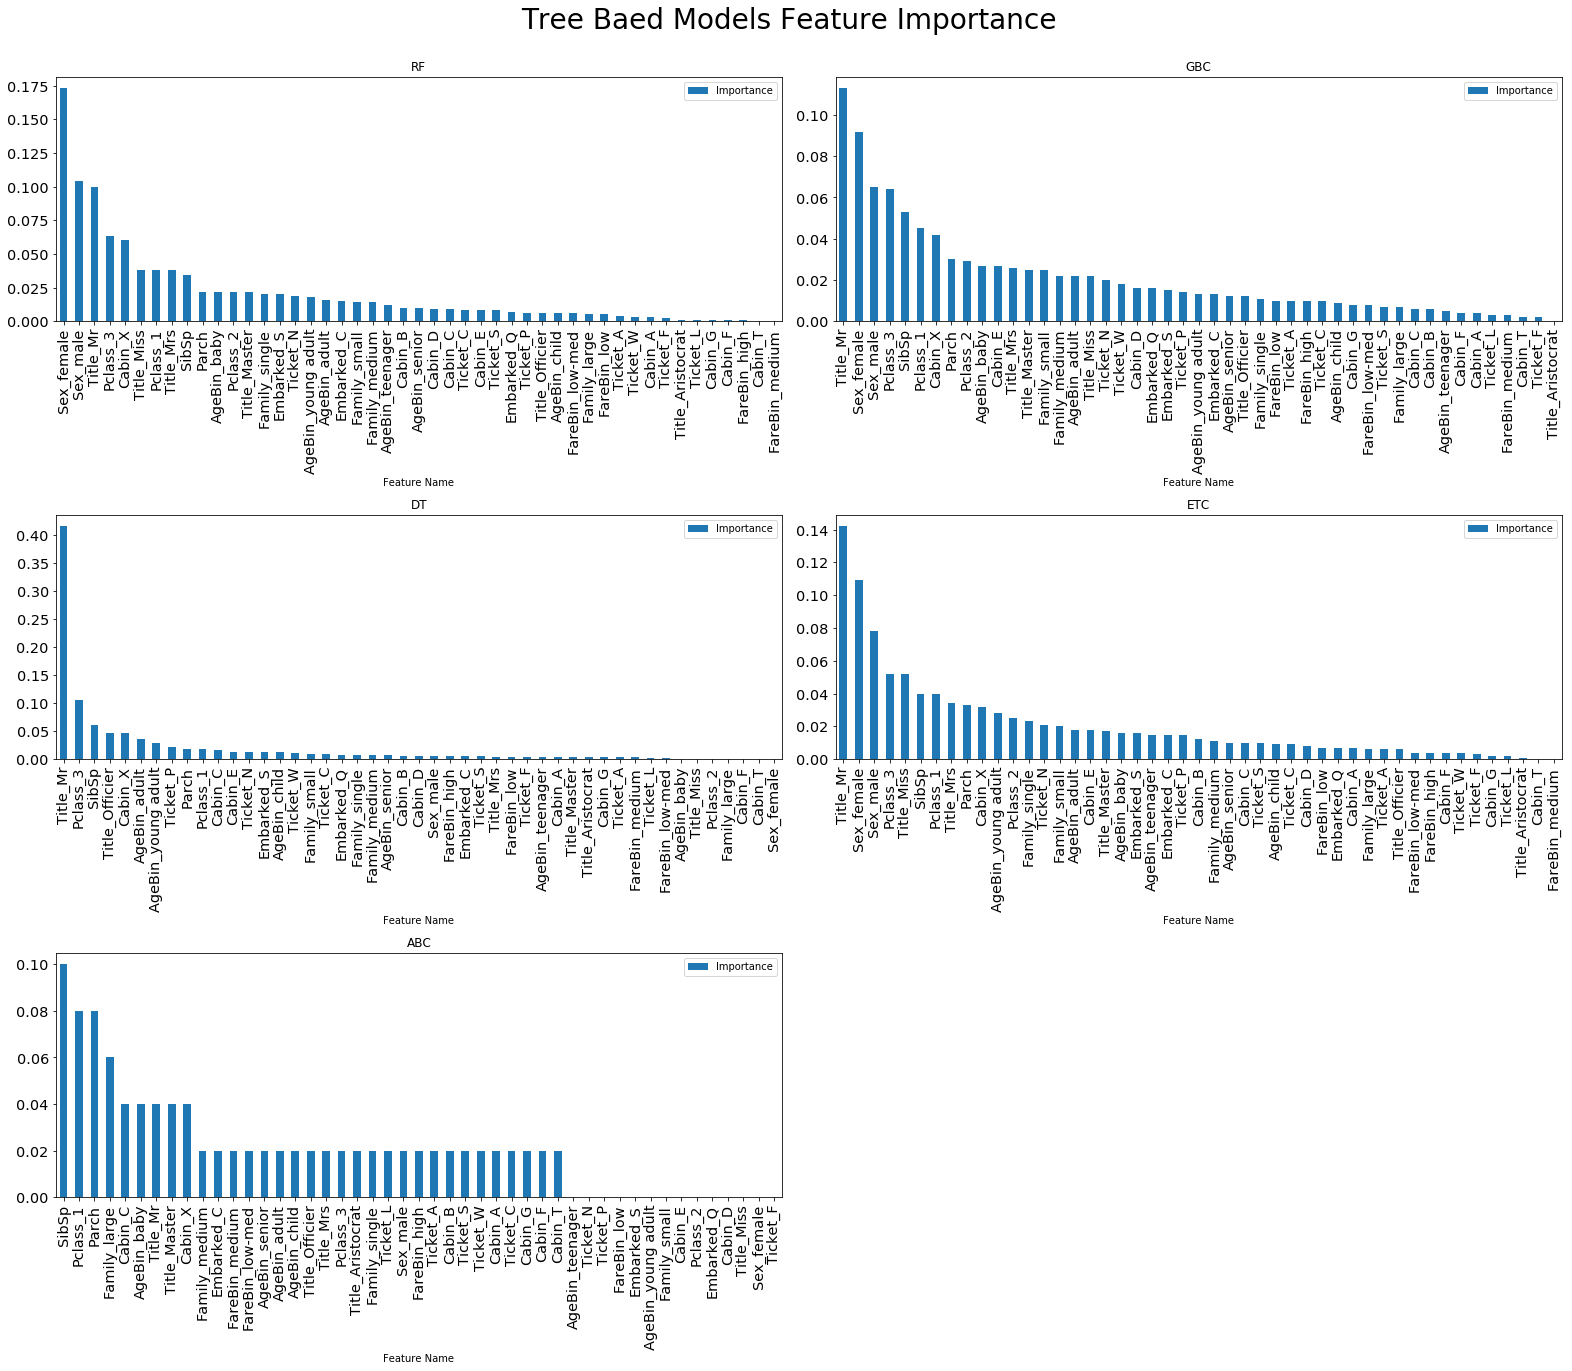

In [54]:
def plot_feature_importance(model):
    features = pd.DataFrame({'Feature Name': train_x.columns, 'Importance': np.round(model.feature_importances_, 3)})
    features = features.sort_values(by = 'Importance', ascending = False).set_index('Feature Name')
    return features

fig, axarr = plt.subplots(3,2, figsize=(22, 20))
f_size = 14.5
plot_feature_importance(rf).plot.bar(ax = axarr[0,0], title = 'RF', fontsize = f_size)
plot_feature_importance(gbc).plot.bar(ax = axarr[0,1], title = 'GBC', fontsize = f_size)
plot_feature_importance(dt).plot.bar(ax = axarr[1,0], title = 'DT', fontsize = f_size)
plot_feature_importance(etc).plot.bar(ax = axarr[1,1], title = 'ETC', fontsize = f_size)
plot_feature_importance(abc).plot.bar(ax = axarr[2,0], title = 'ABC', fontsize = f_size)
plt.suptitle('Tree Baed Models Feature Importance', fontsize = 28)
fig.tight_layout(rect = [0, 0.03, 1, 0.95])
fig.delaxes(ax = axarr[2,1]) # We don't need the last subplot.
plt.show()

Note there are some models in which getting the feature importance is more complex. For example, SVC and LR do not have the simple feature_importances property given through Sklearn. However, below we will extract the feature importance for LR as it was one of the more statistically significant models. 

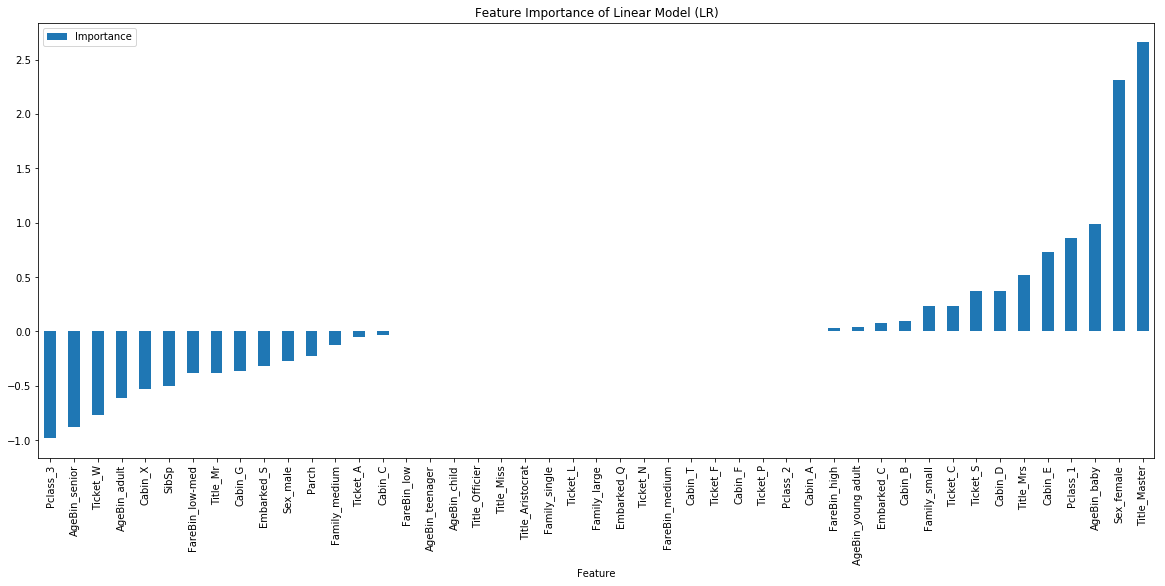

In [71]:
coeff = pd.DataFrame({"Feature":train_x.columns,"Importance":np.transpose(lr.coef_[0])})
coeff.sort_values(by = 'Importance').set_index('Feature').plot.bar(figsize = (20,8))
plt.title('Feature Importance of Linear Model (LR)')
plt.show()

<h1>Learning Curves</h1>

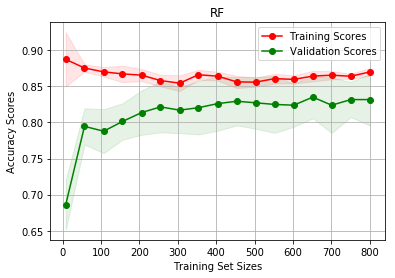

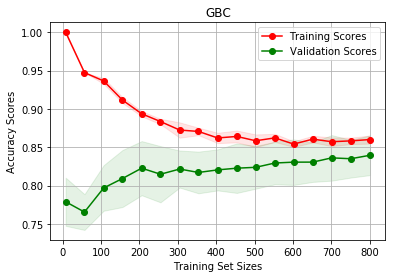

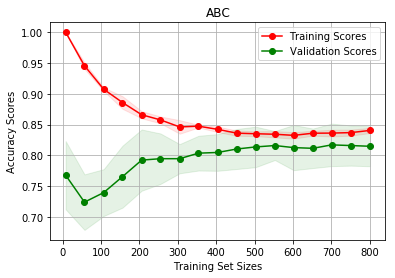

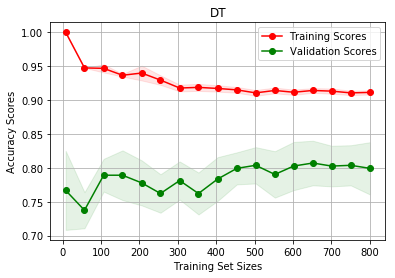

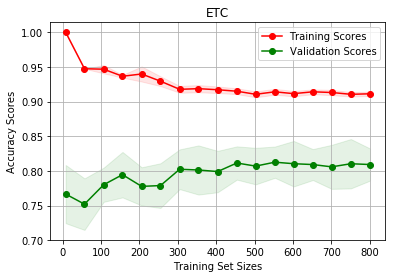

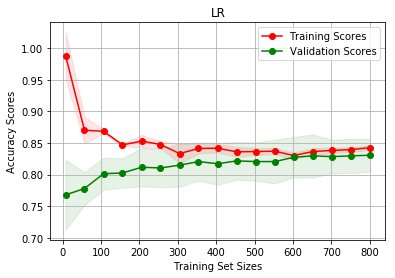

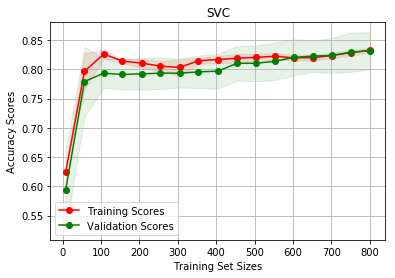

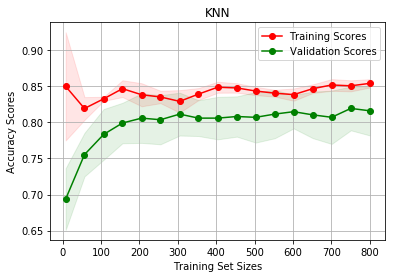

In [77]:
def learning_curves(model, title):
    from sklearn.model_selection import learning_curve
    
    train_sizes, train_scores, validation_scores = learning_curve(model, train_x, train_y, cv=10, scoring='accuracy', n_jobs = -1, train_sizes=np.linspace(0.01, 1.0, 17))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, 'o-', color = 'red', label = 'Training Scores')
    plt.plot(train_sizes, validation_mean, 'o-', color = 'green', label = 'Validation Scores')
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha = 0.1, color = 'g')
    
    plt.xlabel('Training Set Sizes')
    plt.ylabel('Accuracy Scores')
    plt.legend(loc = 'best')
    plt.grid()
    plt.title(title)
    plt.show()
    

lc_labels = ['RF', 'GBC', 'ABC', 'DT', 'ETC', 'LR', 'SVC', 'KNN']
lc_models = [rf, gbc, abc, dt, etc, lr, svc, knn]
for models, labels in zip (lc_models, lc_labels):
    learning_curves(models, title = labels)  

Learning curves are important to check how our models are performing and how we can adjust our inputs or parameters to make more solid predictions. In our case, we see DT and ETC have large variance and as such we could look to reduce number of features to decrease variance and increase bias. On the other spectrum we have models that suffer from low bias, like LR and SVC, for them we should look towards adding more complexity to increase variance and decrease bias. Models like ABC, GBC and RF are perfoming well, the addition of more data should help them converge and increase accuracy rate. 

<h2>More Evaluation Metrics to Consider</h2>

In [80]:
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, train_x, train_y, cv = 10)
    return predicted


def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(train_y, predicted, rownames = ['Actual'], colnames = ['Predicted/Classified'], margins = True) # We use pandas crosstab
    return display(confusion_matrix)

confusion_matrix(rf)
confusion_matrix(gbc)

Predicted/Classified,0.0,1.0,All
Actual,,,
0.0,499,50,549
1.0,96,246,342
All,595,296,891


Predicted/Classified,0.0,1.0,All
Actual,,,
0.0,492,57,549
1.0,85,257,342
All,577,314,891


In comparing the two confusion matrixes, we see that gbc performs better than rf as it predicts more correct. This matches with the accuracies seen above. 

In [81]:
submit_rf = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': rf.predict(test_x)
})

submit_rf.to_csv('submission_rf.csv', index = False)

In [85]:
sub = pd.read_csv('submission_rf.csv')

sub.dtypes

PassengerId      int64
Survived       float64
dtype: object

In [86]:
sub.Survived = sub.Survived.astype(int)

In [87]:
sub.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [88]:
sub.to_csv('submission_rf.csv', index = False)

In [89]:
submit_gbc = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': gbc.predict(test_x)
})

submit_gbc.Survived = submit_gbc.Survived.astype(int)

submit_gbc.to_csv('submission_gbc.csv', index = False)

<h1>Conclusions</h1>

After submitting to Kaggle, the random forrest model performed the best with a score of about 80.3 (top 12%). There are things that could be improved but for now, I feel that this is good enough. I will most certainly return to this one day. Thanks for staying until the end. 